# `Flipkart Mobile Web Scraping & EDA`

In [512]:
import pandas as pd
import numpy as np
import time
import re
import requests
from bs4 import BeautifulSoup

In [513]:
url='https://www.flipkart.com/search?q=mobile&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [514]:
phone_page=requests.get(url)
phone_page.status_code

200

In [515]:
page_content=phone_page.text

In [516]:
soup=BeautifulSoup(page_content)

In [517]:
soup.find_all('a',attrs={'class':'s1Q9rs'})

[<a class="s1Q9rs" href="/realme-c21-cross-blue-64-gb/p/itmf4062d3f37c1a?pid=MOBGF4895YRNAHFZ&amp;lid=LSTMOBGF4895YRNAHFZ3XABXU&amp;marketplace=FLIPKART&amp;q=mobile&amp;store=tyy&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=e5c93747-7286-4bc7-b027-f2cb70c38399.MOBGF4895YRNAHFZ.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=hab7fjovr40000001623649477896&amp;qH=532c28d5412dd75b" rel="noopener noreferrer" target="_blank" title="realme C21 (Cross Blue, 64 GB)">realme C21 (Cross Blue, 64 GB)</a>,
 <a class="s1Q9rs" href="/realme-c21-cross-black-64-gb/p/itmf4062d3f37c1a?pid=MOBGF489G9HRWFZ9&amp;lid=LSTMOBGF489G9HRWFZ9BYFZCR&amp;marketplace=FLIPKART&amp;q=mobile&amp;store=tyy&amp;srno=s_1_2&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=e5c93747-7286-4bc7-b027-f2cb70c38399.MOBGF489G9HRWFZ9.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=hab7fjovr40000001623649477896&amp;qH=532c28d5412dd75b" rel="noopener noreferrer" target="_blank" title="realme C21 (C

## Data Cleaning

In [518]:
clean_phone_name=[]
for x in soup.find_all('a',attrs={'class':'s1Q9rs'}):
    clean_phone_name.append(x.text)

In [519]:
clean_phone_name

['realme C21 (Cross Blue, 64 GB)',
 'realme C21 (Cross Black, 64 GB)',
 'realme C20 (Cool Blue, 32 GB)',
 'realme C20 (Cool Grey, 32 GB)',
 'REDMI 9i (Midnight Black, 64 GB)',
 'POCO M3 (Power Black, 64 GB)',
 'realme Narzo 30A (Laser Black, 32 GB)',
 'realme Narzo 30A (Laser Blue, 32 GB)',
 'realme Narzo 30A (Laser Black, 64 GB)',
 'POCO M3 (Cool Blue, 64 GB)',
 'REDMI 9 Power (Electric Green, 64 GB)',
 'Infinix Smart 5 (Morandi Green, 32 GB)',
 'Infinix Smart 5 (7° Purple, 32 GB)',
 'Infinix Smart 5 (Obsidian Black, 32 GB)',
 'Infinix Smart 5 (Aegean Blue, 32 GB)',
 'REDMI Note 9 (Pebble Grey, 64 GB)',
 'REDMI 9i (Nature Green, 64 GB)',
 'GIONEE Max (Red, 32 GB)',
 'SAMSUNG Galaxy F12 (Sky Blue, 64 GB)',
 'realme C12 (Power Blue, 32 GB)',
 'OPPO A12 (Flowing Silver, 64 GB)',
 'OPPO A12 (Black, 32 GB)',
 'OPPO A12 (Blue, 32 GB)',
 'OPPO A12 (Flowing Silver, 32 GB)',
 'GIONEE Max (Black, 32 GB)',
 'REDMI 9 Power (Mighty Black, 64 GB)',
 'SAMSUNG Galaxy F41 (Fusion Blue, 128 GB)',
 'POC

## Extract multiple pages

In [520]:
product_description=[]
ram=[]
offers=[]
ratings=[]
exchange_offer=[]
price=[]
for i in range(25):
    url=f'https://www.flipkart.com/search?q=mobile&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}'   
    response=requests.get(url)
    content=response.text
    soup=BeautifulSoup(content)
    
    for x in soup.find_all('div',attrs={'class':'_4ddWXP'}):
        
        info=x.find('a',attrs={'class':'s1Q9rs'})
        r=x.find('div',attrs={'class':'_3Djpdu'})
        offer=x.find('div',attrs={'class':'_3Ay6Sb'})
        rating=x.find('div',attrs={'class':'_3LWZlK'})
        exchange=x.find('div',attrs={'class':'_3xFhiH'})
        cost=x.find('div',attrs={'class':'_30jeq3'})
        
        if info is None:
            product_description.append(np.NaN)
        else:
            product_description.append(info.text)
            
        if r is None:
            ram.append(np.NaN)
        else:
            ram.append(r.text)
        if offer is None:
            offers.append(np.NaN)
        else:
            offers.append(offer.text)
        if rating is None:
            ratings.append(np.NaN)
        else:
            ratings.append(rating.text)
        if exchange is None:
            exchange_offer.append(np.NaN)
        else:
            exchange_offer.append(exchange.text)
        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)
        
    
        
        

In [521]:
data=pd.DataFrame({'Product Description':product_description,
                   'RAM':ram,
                   "Ratings":ratings,
                   'Offers':offers,
                   'Exchange Offer':exchange_offer,
                   'Price':price
                  })

In [522]:
data

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price
0,"realme C21 (Cross Blue, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999"
1,"realme C21 (Cross Black, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999"
2,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799"
3,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799"
4,"POCO M3 (Power Black, 64 GB)",6 GB RAM,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499"
...,...,...,...,...,...,...
955,"ViVO V20 (Sunset Melody, 256 GB)",8 GB RAM,4.4,9% off,"Upto ₹15,300 Off on Exchange","₹27,990"
956,"REDMI Note 9 Pro Max (Interstellar Black, 64 GB)",6 GB RAM,4.4,10% off,"Upto ₹15,300 Off on Exchange","₹16,999"
957,"Redmi K20 (Glacier Blue, 128 GB)",6 GB RAM,4.5,NaN,"Upto ₹15,300 Off on Exchange","₹24,999"
958,Itel Muzik110,Deep Blue,4.2,NaN,NaN,"₹1,098"


In [523]:
data.to_csv('flipkart_phone.csv',index=False)

In [524]:
data=pd.read_csv('flipkart_phone.csv')
data.head()

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price
0,"realme C21 (Cross Blue, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999"
1,"realme C21 (Cross Black, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999"
2,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799"
3,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799"
4,"POCO M3 (Power Black, 64 GB)",6 GB RAM,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499"


## Data Ready now clean the data

In [525]:
regx=r'^\w+\s'
pregx=re.compile(regx)

data['Company']=data['Product Description'].apply(lambda x:pregx.search(x).group())

In [526]:
data.head()

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price,Company
0,"realme C21 (Cross Blue, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme
1,"realme C21 (Cross Black, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme
2,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme
3,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme
4,"POCO M3 (Power Black, 64 GB)",6 GB RAM,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499",POCO


In [527]:
data.head()

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price,Company
0,"realme C21 (Cross Blue, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme
1,"realme C21 (Cross Black, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme
2,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme
3,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme
4,"POCO M3 (Power Black, 64 GB)",6 GB RAM,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499",POCO


In [528]:
regx=r'\s[A-Za-z\s0-9]+'
pregx=re.compile(regx)

data['Model']=data['Product Description'].apply(lambda x:np.NaN if pregx.search(x) is None else pregx.search(x).group())

In [529]:
data.head()

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price,Company,Model
0,"realme C21 (Cross Blue, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme,C21
1,"realme C21 (Cross Black, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme,C21
2,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20
3,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20
4,"POCO M3 (Power Black, 64 GB)",6 GB RAM,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499",POCO,M3


In [530]:
data.head()

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price,Company,Model
0,"realme C21 (Cross Blue, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme,C21
1,"realme C21 (Cross Black, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme,C21
2,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20
3,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20
4,"POCO M3 (Power Black, 64 GB)",6 GB RAM,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499",POCO,M3


In [531]:
regx=r'[A-Za-z\s]+,'
pregx=re.compile(regx)

data['Color']=data['Product Description'].apply(lambda x:np.NaN if pregx.search(x) is None else pregx.search(x).group().replace(',',''))

In [532]:
data.head()

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price,Company,Model,Color
0,"realme C21 (Cross Blue, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme,C21,Cross Blue
1,"realme C21 (Cross Black, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme,C21,Cross Black
2,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20,Cool Blue
3,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20,Cool Grey
4,"POCO M3 (Power Black, 64 GB)",6 GB RAM,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499",POCO,M3,Power Black


In [533]:
regx=r'[0-9]+\sGB'
pregx=re.compile(regx)

data['ROM']=data['Product Description'].apply(lambda x:np.NaN if pregx.search(x) is None else pregx.search(x).group())

In [534]:
data.head()

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price,Company,Model,Color,ROM
0,"realme C21 (Cross Blue, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme,C21,Cross Blue,64 GB
1,"realme C21 (Cross Black, 64 GB)",4 GB RAM,4.4,18% off,NaN,"₹8,999",realme,C21,Cross Black,64 GB
2,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20,Cool Blue,32 GB
3,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20,Cool Grey,32 GB
4,"POCO M3 (Power Black, 64 GB)",6 GB RAM,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499",POCO,M3,Power Black,64 GB


In [536]:
data['RAM']=data['RAM'].astype('str')
regx=r'[0-9]+\sGB'
pregx=re.compile(regx)

data['RAM']=data['RAM'].apply(lambda x:np.NaN if pregx.search(x) is None else pregx.search(x).group())

In [537]:
data.head()

,Product Description,RAM,Ratings,Offers,Exchange Offer,Price,Company,Model,Color,ROM
0,"realme C21 (Cross Blue, 64 GB)",4 GB,4.4,18% off,NaN,"₹8,999",realme,C21,Cross Blue,64 GB
1,"realme C21 (Cross Black, 64 GB)",4 GB,4.4,18% off,NaN,"₹8,999",realme,C21,Cross Black,64 GB
2,"realme C20 (Cool Blue, 32 GB)",2 GB,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20,Cool Blue,32 GB
3,"realme C20 (Cool Grey, 32 GB)",2 GB,4.3,15% off,"Upto ₹6,250 Off on Exchange","₹6,799",realme,C20,Cool Grey,32 GB
4,"POCO M3 (Power Black, 64 GB)",6 GB,4.3,19% off,"Upto ₹9,900 Off on Exchange","₹10,499",POCO,M3,Power Black,64 GB


In [538]:
data=data[['Product Description','Company','Model','Color','RAM','ROM','Offers','Price','Exchange Offer','Ratings']]
data.sample(10)

,Product Description,Company,Model,Color,RAM,ROM,Offers,Price,Exchange Offer,Ratings
156,"REDMI 9 Power (Mighty Black, 128 GB)",REDMI,9 Power,Mighty Black,6 GB,128 GB,23% off,"₹12,999","Upto ₹12,250 Off on Exchange",4.3
827,"APPLE iPhone 12 Mini (Blue, 128 GB)",APPLE,iPhone 12 Mini,Blue,NaN,128 GB,2% off,"₹72,900","Upto ₹15,300 Off on Exchange",4.5
799,BlackZone S3,BlackZone,S3,NaN,NaN,NaN,6% off,"₹1,060",NaN,3.7
500,Itel Power 410,Itel,Power 410,NaN,NaN,NaN,NaN,"₹1,249",NaN,4.2
577,"SAMSUNG Galaxy M12 (White, 64 GB)",SAMSUNG,Galaxy M12,White,4 GB,64 GB,2% off,"₹10,990",NaN,4.2
698,"Redmi Note 8 (Neptune Blue, 64 GB)",Redmi,Note 8,Neptune Blue,4 GB,64 GB,NaN,"₹13,999",NaN,4.4
381,DETEL D1 Guru,DETEL,D1 Guru,NaN,NaN,NaN,NaN,₹725,NaN,3.6
462,"realme C3 (Frozen Blue, 32 GB)",realme,C3,Frozen Blue,3 GB,32 GB,NaN,"₹8,999","Upto ₹8,350 Off on Exchange",4.4
824,"SAMSUNG Galaxy A32 (Awesome Blue, 128 GB)",SAMSUNG,Galaxy A32,Awesome Blue,6 GB,128 GB,18% off,"₹20,499","Upto ₹15,300 Off on Exchange",4.2
259,MU M5000,MU,M5000,NaN,NaN,NaN,NaN,"₹1,150",NaN,4.0


## Data file saved

In [539]:
data.to_csv('flipkart_phone.csv',index=False)

## Load data from saved file

In [581]:
data=pd.read_csv('C:\\Users\\manuj\\Innomatics Research labs\\My_Notebooks\\flipkart_phone.csv')

In [582]:
data.head(10)

,Product Description,Company,Model,Color,RAM,ROM,Offers,Price,Exchange Offer,Ratings
0,"realme C21 (Cross Blue, 64 GB)",realme,C21,Cross Blue,4 GB,64 GB,18% off,"₹8,999",NaN,4.4
1,"realme C21 (Cross Black, 64 GB)",realme,C21,Cross Black,4 GB,64 GB,18% off,"₹8,999",NaN,4.4
2,"realme C20 (Cool Blue, 32 GB)",realme,C20,Cool Blue,2 GB,32 GB,15% off,"₹6,799","Upto ₹6,250 Off on Exchange",4.3
3,"realme C20 (Cool Grey, 32 GB)",realme,C20,Cool Grey,2 GB,32 GB,15% off,"₹6,799","Upto ₹6,250 Off on Exchange",4.3
4,"POCO M3 (Power Black, 64 GB)",POCO,M3,Power Black,6 GB,64 GB,19% off,"₹10,499","Upto ₹9,900 Off on Exchange",4.3
5,"REDMI 9i (Midnight Black, 64 GB)",REDMI,9i,Midnight Black,4 GB,64 GB,20% off,"₹7,999","Upto ₹7,450 Off on Exchange",4.3
6,"POCO M3 (Cool Blue, 64 GB)",POCO,M3,Cool Blue,6 GB,64 GB,19% off,"₹10,499","Upto ₹9,900 Off on Exchange",4.3
7,"REDMI 9 Power (Electric Green, 64 GB)",REDMI,9 Power,Electric Green,4 GB,64 GB,25% off,"₹10,499","Upto ₹9,900 Off on Exchange",4.3
8,"realme Narzo 30A (Laser Black, 32 GB)",realme,Narzo 30A,Laser Black,3 GB,32 GB,20% off,"₹7,999","Upto ₹7,450 Off on Exchange",4.4
9,"realme Narzo 30A (Laser Black, 64 GB)",realme,Narzo 30A,Laser Black,4 GB,64 GB,18% off,"₹8,999","Upto ₹8,350 Off on Exchange",4.4


## Data is ready to process

In [583]:
data.dtypes

Product Description     object
Company                 object
Model                   object
Color                   object
RAM                     object
ROM                     object
Offers                  object
Price                   object
Exchange Offer          object
Ratings                float64
dtype: object

In [584]:
data.head()

,Product Description,Company,Model,Color,RAM,ROM,Offers,Price,Exchange Offer,Ratings
0,"realme C21 (Cross Blue, 64 GB)",realme,C21,Cross Blue,4 GB,64 GB,18% off,"₹8,999",NaN,4.4
1,"realme C21 (Cross Black, 64 GB)",realme,C21,Cross Black,4 GB,64 GB,18% off,"₹8,999",NaN,4.4
2,"realme C20 (Cool Blue, 32 GB)",realme,C20,Cool Blue,2 GB,32 GB,15% off,"₹6,799","Upto ₹6,250 Off on Exchange",4.3
3,"realme C20 (Cool Grey, 32 GB)",realme,C20,Cool Grey,2 GB,32 GB,15% off,"₹6,799","Upto ₹6,250 Off on Exchange",4.3
4,"POCO M3 (Power Black, 64 GB)",POCO,M3,Power Black,6 GB,64 GB,19% off,"₹10,499","Upto ₹9,900 Off on Exchange",4.3


## Yet to give a final clean process and Data Type conversion befor EDA

In [585]:
data.head()


,Product Description,Company,Model,Color,RAM,ROM,Offers,Price,Exchange Offer,Ratings
0,"realme C21 (Cross Blue, 64 GB)",realme,C21,Cross Blue,4 GB,64 GB,18% off,"₹8,999",NaN,4.4
1,"realme C21 (Cross Black, 64 GB)",realme,C21,Cross Black,4 GB,64 GB,18% off,"₹8,999",NaN,4.4
2,"realme C20 (Cool Blue, 32 GB)",realme,C20,Cool Blue,2 GB,32 GB,15% off,"₹6,799","Upto ₹6,250 Off on Exchange",4.3
3,"realme C20 (Cool Grey, 32 GB)",realme,C20,Cool Grey,2 GB,32 GB,15% off,"₹6,799","Upto ₹6,250 Off on Exchange",4.3
4,"POCO M3 (Power Black, 64 GB)",POCO,M3,Power Black,6 GB,64 GB,19% off,"₹10,499","Upto ₹9,900 Off on Exchange",4.3


In [586]:
regx=r'\d+,\d+'

pregx=re.compile(regx)
data['Price']=data['Price'].apply(lambda x:np.NaN if pregx.search(x) is None else pregx.search(x).group().replace(',',''))

In [587]:
data.head()

,Product Description,Company,Model,Color,RAM,ROM,Offers,Price,Exchange Offer,Ratings
0,"realme C21 (Cross Blue, 64 GB)",realme,C21,Cross Blue,4 GB,64 GB,18% off,8999,NaN,4.4
1,"realme C21 (Cross Black, 64 GB)",realme,C21,Cross Black,4 GB,64 GB,18% off,8999,NaN,4.4
2,"realme C20 (Cool Blue, 32 GB)",realme,C20,Cool Blue,2 GB,32 GB,15% off,6799,"Upto ₹6,250 Off on Exchange",4.3
3,"realme C20 (Cool Grey, 32 GB)",realme,C20,Cool Grey,2 GB,32 GB,15% off,6799,"Upto ₹6,250 Off on Exchange",4.3
4,"POCO M3 (Power Black, 64 GB)",POCO,M3,Power Black,6 GB,64 GB,19% off,10499,"Upto ₹9,900 Off on Exchange",4.3


In [588]:
data['Price']=data['Price'].astype('float')

In [589]:
data.dtypes

Product Description     object
Company                 object
Model                   object
Color                   object
RAM                     object
ROM                     object
Offers                  object
Price                  float64
Exchange Offer          object
Ratings                float64
dtype: object

In [590]:
data['Offers']=data['Offers'].astype('str')
regx=r'\d+'
pregx=re.compile(regx)
data['Offers on Percentage']=data['Offers'].apply(lambda x:np.NaN if pregx.search(x) is None else pregx.search(x).group())

In [591]:
data['Offers on Percentage']=data['Offers on Percentage'].astype('float')

In [592]:
data.dtypes

Product Description      object
Company                  object
Model                    object
Color                    object
RAM                      object
ROM                      object
Offers                   object
Price                   float64
Exchange Offer           object
Ratings                 float64
Offers on Percentage    float64
dtype: object

In [593]:
data.head()

,Product Description,Company,Model,Color,RAM,ROM,Offers,Price,Exchange Offer,Ratings,Offers on Percentage
0,"realme C21 (Cross Blue, 64 GB)",realme,C21,Cross Blue,4 GB,64 GB,18% off,8999.0,NaN,4.4,18.0
1,"realme C21 (Cross Black, 64 GB)",realme,C21,Cross Black,4 GB,64 GB,18% off,8999.0,NaN,4.4,18.0
2,"realme C20 (Cool Blue, 32 GB)",realme,C20,Cool Blue,2 GB,32 GB,15% off,6799.0,"Upto ₹6,250 Off on Exchange",4.3,15.0
3,"realme C20 (Cool Grey, 32 GB)",realme,C20,Cool Grey,2 GB,32 GB,15% off,6799.0,"Upto ₹6,250 Off on Exchange",4.3,15.0
4,"POCO M3 (Power Black, 64 GB)",POCO,M3,Power Black,6 GB,64 GB,19% off,10499.0,"Upto ₹9,900 Off on Exchange",4.3,19.0


In [594]:
data['Exchange Offer']=data['Exchange Offer'].astype('str')
regx=r'\d+,\d+'
pregx=re.compile(regx)
data['Exchange Offer in Rupees']=data['Exchange Offer'].apply(lambda x:np.NaN if pregx.search(x) is None else pregx.search(x).group().replace(',',''))

In [595]:
data['Exchange Offer in Rupees']=data['Exchange Offer in Rupees'].astype('float')

In [596]:
data.dtypes

Product Description          object
Company                      object
Model                        object
Color                        object
RAM                          object
ROM                          object
Offers                       object
Price                       float64
Exchange Offer               object
Ratings                     float64
Offers on Percentage        float64
Exchange Offer in Rupees    float64
dtype: object

In [597]:
data.head()

,Product Description,Company,Model,Color,RAM,ROM,Offers,Price,Exchange Offer,Ratings,Offers on Percentage,Exchange Offer in Rupees
0,"realme C21 (Cross Blue, 64 GB)",realme,C21,Cross Blue,4 GB,64 GB,18% off,8999.0,nan,4.4,18.0,NaN
1,"realme C21 (Cross Black, 64 GB)",realme,C21,Cross Black,4 GB,64 GB,18% off,8999.0,nan,4.4,18.0,NaN
2,"realme C20 (Cool Blue, 32 GB)",realme,C20,Cool Blue,2 GB,32 GB,15% off,6799.0,"Upto ₹6,250 Off on Exchange",4.3,15.0,6250.0
3,"realme C20 (Cool Grey, 32 GB)",realme,C20,Cool Grey,2 GB,32 GB,15% off,6799.0,"Upto ₹6,250 Off on Exchange",4.3,15.0,6250.0
4,"POCO M3 (Power Black, 64 GB)",POCO,M3,Power Black,6 GB,64 GB,19% off,10499.0,"Upto ₹9,900 Off on Exchange",4.3,19.0,9900.0


## Data is cleaned with data type conversion

## Unnecessary columns dropped

In [598]:
data.drop(['Offers','Exchange Offer'],axis=1,inplace=True)

In [599]:
data.head()

,Product Description,Company,Model,Color,RAM,ROM,Price,Ratings,Offers on Percentage,Exchange Offer in Rupees
0,"realme C21 (Cross Blue, 64 GB)",realme,C21,Cross Blue,4 GB,64 GB,8999.0,4.4,18.0,NaN
1,"realme C21 (Cross Black, 64 GB)",realme,C21,Cross Black,4 GB,64 GB,8999.0,4.4,18.0,NaN
2,"realme C20 (Cool Blue, 32 GB)",realme,C20,Cool Blue,2 GB,32 GB,6799.0,4.3,15.0,6250.0
3,"realme C20 (Cool Grey, 32 GB)",realme,C20,Cool Grey,2 GB,32 GB,6799.0,4.3,15.0,6250.0
4,"POCO M3 (Power Black, 64 GB)",POCO,M3,Power Black,6 GB,64 GB,10499.0,4.3,19.0,9900.0


# `EDA`

In [600]:
data.columns

Index(['Product Description', 'Company', 'Model', 'Color', 'RAM', 'ROM',
       'Price', 'Ratings', 'Offers on Percentage', 'Exchange Offer in Rupees'],
      dtype='object')

In [601]:
data.shape

(960, 10)

In [602]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Product Description       960 non-null    object 
 1   Company                   960 non-null    object 
 2   Model                     960 non-null    object 
 3   Color                     560 non-null    object 
 4   RAM                       530 non-null    object 
 5   ROM                       560 non-null    object 
 6   Price                     806 non-null    float64
 7   Ratings                   948 non-null    float64
 8   Offers on Percentage      580 non-null    float64
 9   Exchange Offer in Rupees  405 non-null    float64
dtypes: float64(4), object(6)
memory usage: 75.1+ KB


In [603]:
data.isnull().sum()

Product Description           0
Company                       0
Model                         0
Color                       400
RAM                         430
ROM                         400
Price                       154
Ratings                      12
Offers on Percentage        380
Exchange Offer in Rupees    555
dtype: int64

## Process missing values

#### There are missing values in `Offers in percentage` and `Exchange offer in rupees` column, Actually they are not missing. The fact is `company do not provide offer


#### We can `assume` ROM missing values as mode of ROM column
#### We can `assume` RAM missing values as mode of RAM column
#### We can `assume` Color missing values as mode of Color column
#### We have to replace Price column missing values by some feature engineering techniques ( by RAM or ROM )


## It's the safest 

In [604]:
data.isnull().sum()

Product Description           0
Company                       0
Model                         0
Color                       400
RAM                         430
ROM                         400
Price                       154
Ratings                      12
Offers on Percentage        380
Exchange Offer in Rupees    555
dtype: int64

In [605]:
data['ROM'].mode()

0    128 GB
dtype: object

In [606]:
data['RAM'].mode()

0    4 GB
dtype: object

In [607]:
data['Color'].mode()

0    Blue
dtype: object

In [608]:
data['ROM'].fillna(value='64 GB',inplace=True)

In [609]:
data['RAM'].fillna(value='4 GB',inplace=True)

In [610]:
data['Color'].fillna(value='Blue',inplace=True)

In [611]:
data.isnull().sum()

Product Description           0
Company                       0
Model                         0
Color                         0
RAM                           0
ROM                           0
Price                       154
Ratings                      12
Offers on Percentage        380
Exchange Offer in Rupees    555
dtype: int64

## `Univariate Analysis`

In [621]:
data.columns

Index(['Product Description', 'Company', 'Model', 'Color', 'RAM', 'ROM',
       'Price', 'Ratings', 'Offers on Percentage', 'Exchange Offer in Rupees'],
      dtype='object')

## Categorical Data:
- Company
- Model
- Color
- RAM
- ROM

## Numerical Data:
- Price
- Ratings
- Offers on Percentage
- Exchange Offer in Rupees

In [612]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## - Company

In [613]:
data['Company'].value_counts()

SAMSUNG        106
realme         101
Kechaoda        74
REDMI           67
Itel            58
OPPO            52
KARBONN         38
Infinix         38
POCO            35
LAVA            34
ViVO            32
GFive           29
Nokia           27
APPLE           26
I               22
Micromax        22
Redmi           19
BlackZone       17
MOTOROLA        16
Snexian         15
Tecno           14
GIONEE           9
GREENBERRI       7
Salora           6
Forme            6
Ismart           6
Easyfone         6
MU               5
Mi               5
Jmax             4
MI               4
GreenBerry       4
Intex            4
Panasonic        4
Nuvo             4
Apple            4
Good             4
Geotel           3
DETEL            3
Jivi             3
Lava             3
Tork             2
KXD              2
LG               2
Spinup           2
Jio              2
Coolpad          2
Infocus          2
Quick            2
ENERGIZER        1
Google           1
anee             1
Ssky        

<AxesSubplot:>

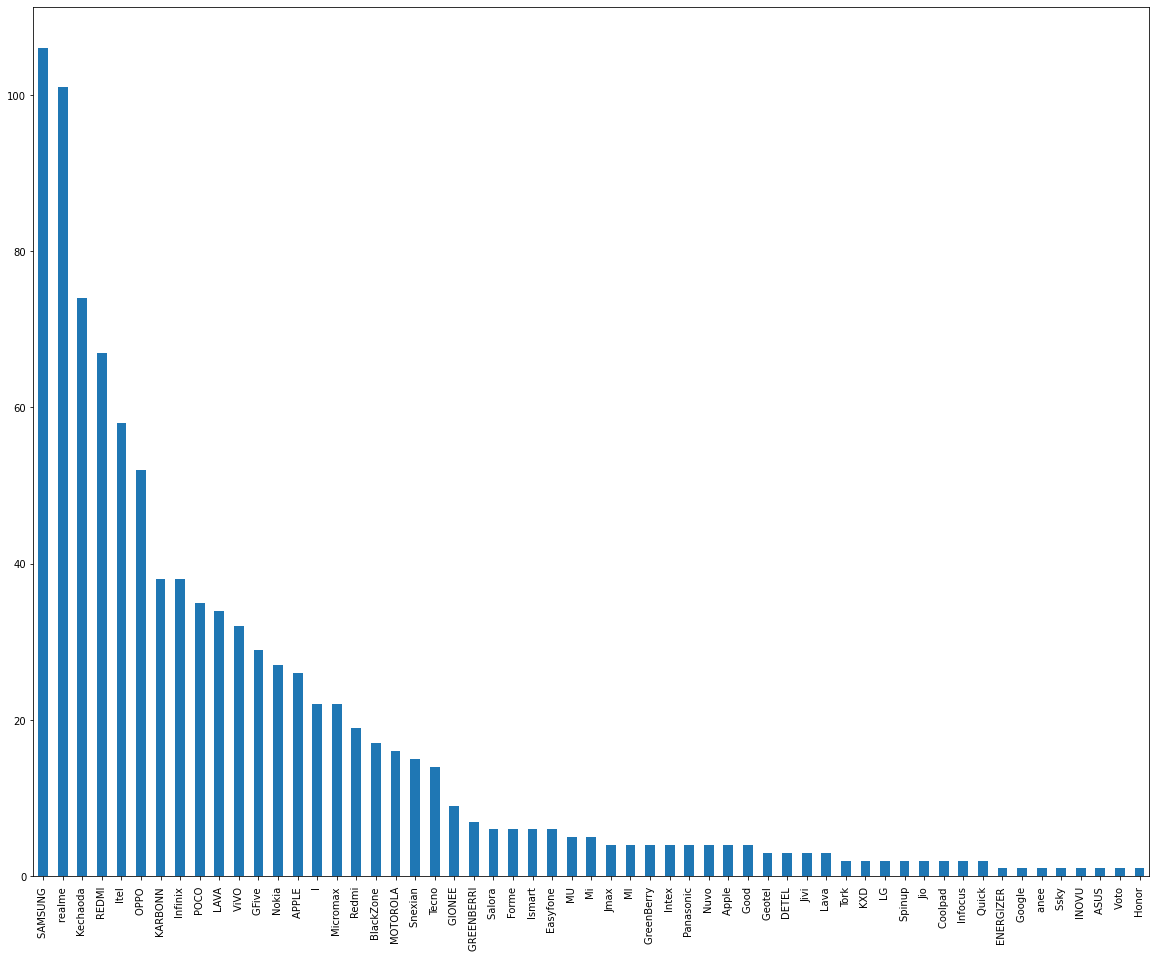

In [614]:
plt.figure(figsize=(20,16))
data['Company'].value_counts().plot.bar()

## - RAM

In [619]:
data['RAM'].value_counts()

4 GB     605
6 GB     135
8 GB      88
2 GB      67
3 GB      54
12 GB      8
1 GB       3
Name: RAM, dtype: int64

In [616]:
px.bar(x=data['RAM'])

## Maximum phones have 4 GB of RAM

## - ROM

In [620]:
data['ROM'].value_counts()

64 GB     590
128 GB    225
32 GB     109
256 GB     23
16 GB      13
Name: ROM, dtype: int64

In [577]:
px.bar(x=data['ROM'])

## Maximum phones have 64 GB of ROM

## - Price

In [628]:
data['Price'].describe()

count      806.000000
mean     11782.945409
std      12476.719123
min        125.000000
25%       1556.750000
50%       9499.000000
75%      15999.000000
max      82900.000000
Name: Price, dtype: float64

In [622]:
px.box(x=data['Price'])

In [624]:
data.columns

Index(['Product Description', 'Company', 'Model', 'Color', 'RAM', 'ROM',
       'Price', 'Ratings', 'Offers on Percentage', 'Exchange Offer in Rupees'],
      dtype='object')

In [625]:
px.box(x=data['Ratings'])

In [626]:
px.box(x=data['Offers on Percentage'])

In [627]:
px.box(x=data['Exchange Offer in Rupees'])